# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- ipywidgets and ipykernel if necessary
- Starter Code was tested on Python 3.11.5

In [39]:
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tqdm import tqdm

from pynput import keyboard


# 1: Complete the Implementation of the Four Rooms environment 

- The FourRooms is implemented as a python class. We explain the attributes and methods as follows
    - **init** function: Define all the attributes of the Four Rooms environment. For example, the state space, the action space, the start state, the goal state and so on.
    - **reset** function: Resets the agent to the start state (0, 0)
    - **step** function: Takes the current state and one action, returns the next state and a reward
   
- Please complete the implementation in the step function.

In [40]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
        
        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}
        
        # define the start state
        self.start_state = [0, 0]
        
        # define the goal state
        self.goal_state = [10, 10]
        

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward
        

    def step(self, state, act):
        """
        Args: 
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        perpendiculars = {
            "UP":["LEFT", "RIGHT"],
            "DOWN":["RIGHT", "LEFT"],
            "LEFT":["DOWN", "UP"],
            "RIGHT":["UP", "DOWN"]
        }

        correct_prob = 0.8
        sample = np.random.uniform(0, 1)
        
        if sample <= correct_prob:
            next_act = act
        
        else:
            next_act = np.random.choice(perpendiculars[act])

        next_state = self.take_action(state, next_act)
        
        # compute the reward based on the resulting state
        reward = 0
        if next_state == self.goal_state:
            reward = 1

        # return the current state, reward
        return next_state, reward
        

    """ DO NOT CHANGE BELOW """
    def take_action(self, state, act):
        """
        Input args: 
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [41]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2 Implement the manual policy

Use this to check your whether your implementation of the step function is correct.

In [42]:
def get_manual_action():
    action_map = {'u': "UP", 'l': "LEFT", 'd': "DOWN", 'r': "RIGHT"}
    while True:
        key = input("Action (u/l/d/r): ").lower().strip()
        if key[0] in action_map:
            return action_map[key[0]]


In [ ]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()
    state, reward = env.reset()  # always call reset() before interaction
    
    # manual time step (YOU CAN CHANGE THIS TO ANY TIME STEP YOU WANT)
    time_step = 100

    # create a loop
    for t in range(time_step):
        
        action = get_manual_action()
        next_state, reward = env.step(state, action)
        
        """DO NOT CHANGE BELOW"""
        # print interaction
        print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")
        
        # reset if the agent reaches the goal
        if reward == 1:
            print("Reset the agent to the start state!")
            state, reward = env.reset()
        else:
            state = next_state



# 3 Implement a random policy

We provide the scaffolding code for running and plotting. Please implement a random policy

**Please note: you should read the code carefully before implementing to make sure the variable names are aligned.**

Run trial: 100%|██████████| 10/10 [00:00<00:00, 20.85it/s]


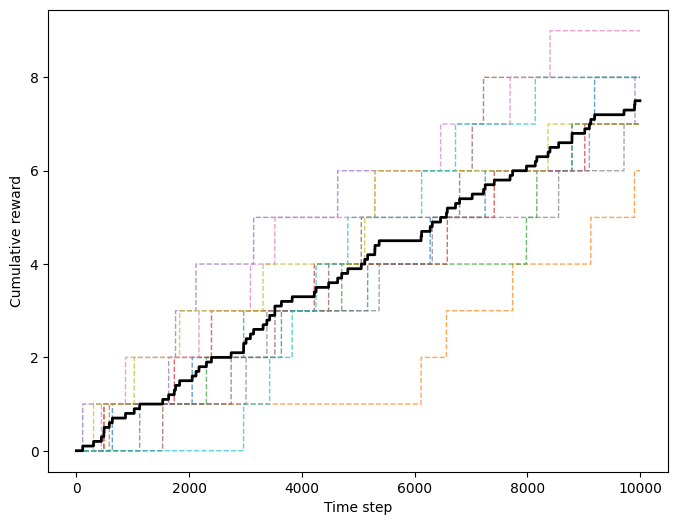

In [72]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4) #1e4
    
    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            rand_action = list(env.action_space.keys())[np.random.randint(0,4)]
            next_state, reward = env.step(state, rand_action)
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)

### How do you think this compares with your manual policy? What are some reasons for the difference in performance?


This random policy performs much worse than I would expect the manual policy to perform. This is because, with the manual policy, the operator is granted priviledged with external information about the agent's environment and can plan ahead to make intentional and efficient steps to the goal state. With the random policy however, the agent as no additional information about its environment, and only takes random actions. This difference in performance can be shown as well. From the plot above, it seems that it takes the randomly acting agent about 1000 steps to reach the goal state once. However, with the manual policy, I am able to reach the goal state in about 25 steps. Obviously much more efficient.  

# 4 Implement better & worse policies against the Random Policy

# Better Policy

In [73]:
def get_better_action():
    actions = {
        "good" : ["UP", "RIGHT"],
        "bad" : ["DOWN", "LEFT"]
    }
    sample = np.random.uniform(0, 1)

    if sample <= 0.90:
        action = np.random.choice(actions["good"])

    else:
        action = np.random.choice(actions["bad"])

    return action
        


Run trial: 100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


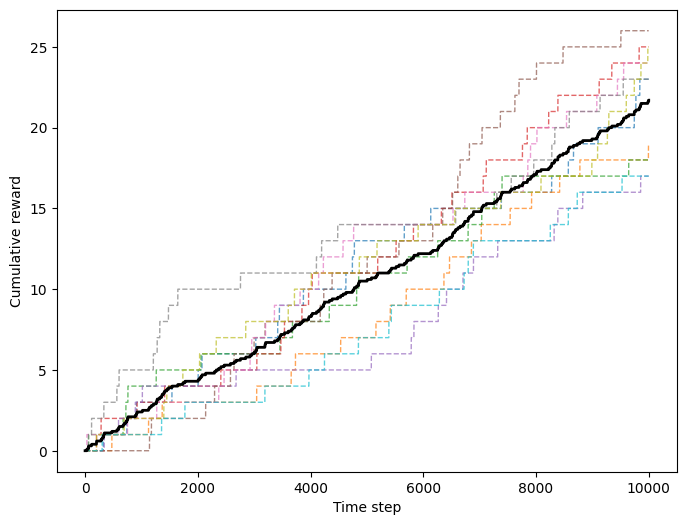

In [74]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()
    
    # number of the trail
    trial_num = 10  
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):

            action = get_better_action()
            next_state, reward = env.step(state, action)
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)

# Worse Policy

In [76]:
def get_worse_action():
    actions = {
        "good" : ["UP", "RIGHT"],
        "bad" : ["DOWN", "LEFT"]
    }
    sample = np.random.uniform(0, 1)

    if sample >= 0.999:
        action = np.random.choice(actions["bad"])

    else:
        action = np.random.choice(actions["good"])

    return action

Run trial: 100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


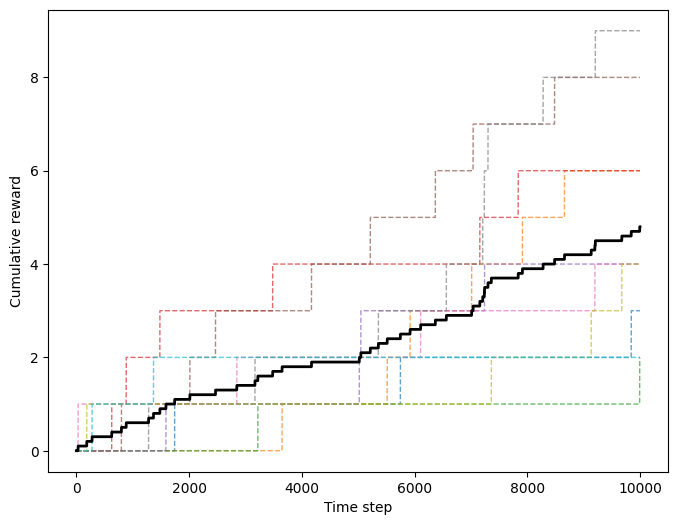

In [75]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()
    
    # number of the trail
    trial_num = 10  
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):

            action = get_worse_action()
            next_state, reward = env.step(state, action)
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)

## Describe the strategy each policy uses, and why that leads to generally worse/better performance:

### Better Policy:
For the Better Policy, I still had the agent act randomly, however I shifted the probability distribution so that the agent is more likely to make "productive moves" moving upwards and to the right, towards the goal state. I changed the distribution so that there is a 90% chance of a productive move and only a 10% chance of an "unproductive move" (downwards or to the left). This policy, while not perfect, results in an average final cumulative reward of ~22 compared to the cumulative reward of ~8 from the random policy. 

### Worse Policy:
For the Worse Policy, I used a similar strategy as for the Better Policy, however the probability favors the "unproductive moves" more heavily, a 99% chance, compared to the "productive moves", a 1% probability. This policy results in an average final cumulative reward of ~5 compared to the cumulative reward of ~8 from the random policy. 